In [472]:
%reset
from sympy import init_printing
from tqdm.auto import tqdm
import sympy as sp
import pandas as pd
import random
import string
import traceback
import time
init_printing()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Vocabulary**

In [473]:
symbol = lambda x: sp.Symbol(x, commutative = True)

In [474]:
identifiers = [i for i in list(string.ascii_lowercase + string.ascii_uppercase) if i not in ['i','e','d','O']]

In [475]:
symbols = [symbol(i) for i in identifiers]

**Rules**

In [476]:
def add(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0] + y, x.args[1] + y)
    
    else:
        return x + y

In [477]:
add(symbols[0], symbols[1])

In [478]:
def minus(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0] - y, x.args[1] - y)
    
    else:
        return x - y

In [479]:
def times(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0]*y, x.args[1]*y)
    
    else:
        return x*y

In [480]:
def power(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0]**y, x.args[1]**y)
    
    else:
        return x**y

In [481]:
def divide(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(x.args[0]/y, x.args[1]/y)
    
    else:
        return x/y

In [482]:
def differentiate(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.diff(x.args[0], y, evaluate=False), sp.diff(x.args[1], y, evaluate=False))
    
    else:
        y = random.choice(list(x.free_symbols))
        return sp.diff(x, y, evaluate = False)

In [483]:
def integrate(x, y):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.Integral(x.args[0], y), sp.Integral(x.args[1], y))
    
    else:
        y = random.choice(list(x.free_symbols))
        return sp.Integral(x, y)

In [484]:
def evaluate_integrals(x):
    # assumes derivation D is a global list of equations
    # D_local is a local copy of D which is edited within this function
    # assumes a list of symbols
    # does not integrate terms containing DOUBLE INTEGRALS or higher
    
    if contains_double_integral(x) == False:
    
        D_local = [i[0] for i in D.copy()]

        used_symbols = []
        for eq in D_local:
            used_symbols.extend(list(eq.free_symbols))

        integral_constants = [i for i in symbols if i not in used_symbols]

        if type(x) == sp.Integral:
            return x.doit() + random.choice(integral_constants)

        elif type(x) == sp.Equality:
            elems = get_equation_elements(x)

            integrals = [i for i in elems if type(i) == sp.Integral]

            subs = [(i, i.doit() + random.choice(integral_constants)) if str(sp.simplify(i)) != str(sp.simplify(i.doit())) else (i, i) for i in integrals]

            for i in subs:
                x = x.subs(i[0], i[1])

            return x

        else:
            return x
        
    else:
        
        return x

In [485]:
def evaluate_derivatives(x):
    
    if type(x) == sp.Derivative:
        return x.doit()
    
    elif type(x) == sp.Equality:
        elems = get_equation_elements(x)
        
        derivatives = [i for i in elems if (type(i) == sp.Derivative) and ('\int' not in sp.latex(i))]
        
        subs = [(i, i.doit()) for i in derivatives]
        
        for i in subs:
            x = x.subs(i[0], i[1])
            
        return x
    
    else:
        return x

In [486]:
def cos(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.cos(x.args[0]), sp.cos(x.args[1]))
    
    else:
        return sp.cos(x)

In [487]:
def sin(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.sin(x.args[0]), sp.sin(x.args[1]))
    
    else:
        return sp.sin(x)

In [488]:
def exp(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.exp(x.args[0]), sp.exp(x.args[1]))
    
    else:
        return sp.exp(x)

In [489]:
def log(x):
    
    if type(x) == sp.Equality:
        return sp.Eq(sp.log(x.args[0]), sp.log(x.args[1]))
    
    else:
        return sp.log(x)

In [490]:
def expand(x):
    return sp.expand(x)

In [491]:
def substitute_LHS_for_RHS(eq_1, eq_2):
    return eq_1.subs(eq_2.args[0], eq_2.args[1])

In [492]:
def substitute_RHS_for_LHS(eq_1, eq_2):
    return eq_1.subs(eq_2.args[1], eq_2.args[0])

In [493]:
def get_premise(symbols):
    
    symbols = symbols 
    
    rules_1 = [cos, sin, exp, log]
    rules_2 = [add, minus, times, power, divide, differentiate, integrate]
    
    arity = random.choice([1,2])

    if arity == 1:
        rule = random.choice(rules_1)
        sym = random.choice(symbols)
        RHS = rule(sym)
        LHS = random.choice([i for i in symbols if i != sym])

    elif arity == 2:
        rule = random.choice([i for i in rules_2 if i not in [differentiate, integrate]])
        sym_1 = random.choice(symbols)
        sym_2 = random.choice([i for i in symbols if i != sym_1])
        RHS = rule(sym_1, sym_2)
        LHS = random.choice([i for i in symbols if i not in [sym_1, sym_2]])
        

    # make RHS more complex
    complexity = random.choice(range(2))

    for i in range(complexity):
        
        arity = random.choice([1,2])
        
        if arity == 1:
            rule = random.choice(rules_1)
            RHS = rule(RHS)
            
        elif arity == 2:
            rule = random.choice(rules_2)
            sym = random.choice(symbols)
            
            RHS = rule(RHS, sym)
            
    LHS = sp.Function(LHS)(*tuple(RHS.free_symbols))

    eq = sp.Eq(LHS, RHS)
    
    return eq

In [494]:
def renaming_premise(symbols):
    
    while True:
        elems = []
        for eq, _ in D:
            elems.extend(get_equation_elements(eq))

        elems = list(dict.fromkeys(elems))

        # more than one free symbol in RHS
        elems = [i for i in elems if len(list(i.free_symbols)) > 0 and len(str(i)) > 1]

        RHS = random.choice(elems)

        LHS = sp.Function(random.choice([i for i in symbols if i not in RHS.free_symbols]))(*tuple(RHS.free_symbols))
        
        if len(str(type(RHS))) > 1 and str(LHS) not in str(D):
            break

    return sp.Eq(LHS, RHS)

In [495]:
def get_equation_elements(eq):

    args = list(eq.args)

    while True:

        old_length = len(args)

        for i in args:
            args.extend(i.args)

        args = list(dict.fromkeys(args))

        new_length = len(args)

        if new_length == old_length:
            break
            
    return [i for i in args if type(i) != sp.Tuple]

In [496]:
contains_double_integral = lambda eq: True if True in ['\\iint' in sp.latex(i) for i in get_equation_elements(eq)] else False

In [497]:
def pref_eqs(D, p):
    # makes the last equation p times more likely
    # equation n-i is p-i times more likely

    out = []

    new_D = D.copy()[-p:]
    new_D.reverse()
    for i in range(len(new_D)):
        if p-1 > i:
            out.extend([new_D[i]]*(p-i-1)**3)
        
    out.reverse()
    return D + out

In [498]:
def valid_substitutions(rule_name, D):

    sub_options = []
    
    for i in D:
        for j in D:
            if str(i) != str(j):
                LHS, RHS = j.args
                
                if (type(LHS) is not sp.numbers.One) and (type(LHS) is not sp.numbers.Zero) and (type(RHS) is not sp.numbers.Zero) and (type(RHS) is not sp.numbers.One):
                
                    if rule_name == "substitute_LHS_for_RHS":

                        if (str(LHS) in str(i)) and (type(i.subs(LHS, RHS)) is sp.Equality) and (i.subs(LHS, RHS) != i):

                            pair = [D.index(i), D.index(j)]
                            sub_options.append(pair) if pair not in sub_options else 0

                    elif rule_name == "substitute_RHS_for_LHS":

                        if (str(RHS) in str(i)) and (type(i.subs(RHS, LHS)) is sp.Equality) and (i.subs(RHS, LHS) != i):

                            pair = [D.index(i), D.index(j)]
                            sub_options.append(pair) if (pair not in sub_options) and (pair[0] != pair[1]) else 0
                    
    return sub_options

In [499]:
def step(D, p_history=10, p_arity_0=5, p_renaming=100, p_arity_1=50, p_evaluate=50, p_arity_2=100, p_int_or_diff=2, p_subs=30):
    
    
    # p_history: equation n-i is p-i times more likely (prioritises more recent equations like memory)
    # p_arity_0: overall probability multiplier for arity 0 functions
    # p_renaming: relevant prob multiplier for renaming premises
    # p_arity_1: overall probability multiplier for arity 1 functions
    # p_evaluate: relative probabilty of int or diff evaluations is multiplied by p_evaluate for arity 1 functions
    # p_arity_2: overall probability multiplier for arity 2 functions
    # p_int_or_diff: relative probability multiplier for int or diff compared to other arity 2 functions without multipliers
    # p_subs: same as p_int_or_diff but for substitution functions
    
    A = [i[1] for i in D] # only annotations
    D = [i[0] for i in D] # only equations
    
    rules_0 = [
        
        get_premise,


    ] + [renaming_premise]*p_renaming
    

    rules_1 = [
        
        cos,
        sin,
        exp,
        log,
        expand
        
    ] + [evaluate_derivatives, evaluate_integrals]*p_evaluate
    
    
    rules_2 = [
        
        add,
        minus,
        times,
        divide,
        power
    
    ] + [differentiate, integrate]*p_int_or_diff + [substitute_LHS_for_RHS, substitute_RHS_for_LHS]*p_subs


    # assumes D has at least one equation so far
    relevant_equation_elements = []

    for eq in D:
        relevant_equation_elements.extend(get_equation_elements(eq))
    relevant_equation_elements = list(dict.fromkeys(relevant_equation_elements))

    arity = random.choice([0]*p_arity_0 + [1]*p_arity_1 +[2]*p_arity_2)
    
    elem_1 = 0
    
    if arity == 0:
        rule = random.choice(rules_0)
        eq = rule(symbols)
        annotation = rule.__name__

    if arity == 1:
        rule = random.choice(rules_1)

        # elem_1 can be equation
        elem_1 = random.choice(pref_eqs(D, p_history))
        eq = rule(elem_1)
                
        n = D.index(elem_1)
                
        annotation = [rule.__name__, n+1]
                

    if arity == 2:
        
        # no substitution rules if only 1 equation in D
        if len(D) == 1:
            
            rule = random.choice([i for i in rules_2 if 'subs' not in str(i.__name__)])
        else:
            
            rule = random.choice(rules_2)
        
        # substitution
        if ("subs" in rule.__name__):
            if valid_substitutions(rule.__name__, D) != []:
                

                n_1, n_2 = random.choice(valid_substitutions(rule.__name__, D))

                elem_1, elem_2 = D[n_1], D[n_2]
                
                annotation = [rule.__name__, n_1+1, n_2+1]
            
        
        # integration or differentiation
        elif rule.__name__ in ['integrate', 'differentiate']:
            
            # elem_1 can be an equation
            elem_1 = random.choice(pref_eqs(D, p_history))

            # elem_2 can be an equation with components in elem_1
            elem_2 = random.choice([i for i in get_equation_elements(elem_1) if len(str(i)) == 1 and str(i) not in string.digits])
            
            n = D.index(elem_1)
                    
            annotation = [rule.__name__, n+1, elem_2]
            
        
        # integration or differentiation
        elif rule.__name__ in ['power']:
            
            # elem_1 can be an equation
            elem_1 = random.choice(pref_eqs(D, p_history))

            # elem_2 can be an equation with components in elem_1
            elem_2 = random.choice([i for i in get_equation_elements(elem_1) if len(str(i)) < 3])
            
            n = D.index(elem_1)
                    
            annotation = [rule.__name__, n+1, elem_2]
            

        else:

            # elem_1 can be an equation
            elem_1 = random.choice(pref_eqs(D, p_history))

            # elem_2 can be an equation element
            elem_2 = random.choice([i for i in relevant_equation_elements if str(i) not in string.digits])
            
            n = D.index(elem_1)
                    
            annotation = [rule.__name__, n+1, elem_2]

        eq = rule(elem_1, elem_2)
        

    if type(eq) == sp.Equality:
            
            swapped_eq = sp.Eq(eq.args[1], eq.args[0])
            
            if (eq in D) or ('Subs' in str(eq)) or ('Piecewise' in str(eq)) or (swapped_eq in D) or len(sp.latex(eq)) >= 350:
                return False
            
            # success
            else:
                return (eq, annotation)

    else:
        return False

In [500]:
# for j in range(len(D)):
#     print(j+1)
#     eq, annotation = D[j]
    
#     if type(annotation) == tuple:
#         for i in annotation:
#             display(i)
#     else:
#         print(annotation)
    
#     print('\n')
#     display(eq)
    
#     print('--------------------------------------------------------------------------------------------')

**Use annotations to only include relevant steps in a derivation**

In [501]:
def extract_chain_starting_from_i(i, eq_pairs):
    # eq_pairs is a reverse chronological list of current equation numbers,
    # and the past equation numbers used to make them 
    # e.g., [30, 28], [29, 14], [28, 23, 2]
    
    chain = [eq_pairs[i]]


    while True:

        current_eq = chain[-1][0]
        used_eq = chain[-1][1]

        for pair in eq_pairs:

            last_eq = pair[0]
            if last_eq == used_eq:
                chain.append(pair)

        if (len(chain[-1]) == 1):
            chain.append(pair) if pair not in chain else 0
            break

    chain_nums = []
    for i in chain:
        chain_nums.extend(i)

    valid_chain = [i for i in chain if len(i) == 1 and i[0] in chain_nums] + chain

    chain = [i for i in chain if i in valid_chain]

    return chain

In [502]:
def merge_chains(chain, eq_pairs):
    
    # finds all chains which come from separate derivations that are substituted in
    # merges any new equations reverse chronologically
    
    
    while True:
    
        old_chain = chain.copy()

        first_numbers = [i[0] for i in chain]

        # unaccounted for eqs
        missing_eqs = [i[2] for i in chain if len(i) > 2] + [i[1] for i in chain if len(i) > 1 and i[1] not in first_numbers]

        for i in eq_pairs:
            chain.append(i) if (i[0] in missing_eqs) and i not in chain else 0

        if old_chain == chain:
            break

    chain_dict = {i[0]:i for i in chain}

    return sorted(chain)

In [503]:
is_subset = lambda chain_1, chain_2: [i for i in chain_1 if i not in chain_2] == [] if chain_1 != chain_2 else False

In [504]:
def extract_derivations(D):
    
    A = [[i+1] + list(D[i][1]) if type(D[i][1]) is list else [i+1, D[i][1]] for i in range(len(D))]

    A.reverse()

    eq_pairs = []

    for row in A:
        if 'subs' in str(row):
            eq_pairs.append([row[0], row[2], row[3]])
        elif 'premise' in str(row):
            eq_pairs.append([row[0]])
        else:
            eq_pairs.append([row[0], row[2]])

    chains = []
    for i in range(len(eq_pairs)-1):
        if len(eq_pairs[i]) > 1:
            chains.append(extract_chain_starting_from_i(i, eq_pairs))

    chains = [merge_chains(i, eq_pairs) for i in chains]

    final_chains = [i for i in chains.copy() if len(i) >= 3]
    for i in chains:
        for j in chains:
            if is_subset(i,j):
                try:
                    final_chains.remove(i)
                except:
                    pass

    derivations = []

    for n in range(len(final_chains)):
        D_idxs = [i[0]-1 for i in final_chains[n]]

        derivation = [D[n] for n in D_idxs]

        derivations.append(derivation)

    return derivations

In [505]:
def fix_equation_indexes(derivation, D):

    good_bad_idxs = [[i+1,D.index(derivation[i])+1] for i in range(len(derivation))]

    for i in range(len(derivation)):
        for j in range(len(derivation[i][1])):
            for idx in good_bad_idxs:
                if derivation[i][1][j] == idx[1]:
                    derivation[i][1][j] = idx[0]
                    
    return derivation

In [506]:
def create_df_row(derivation):

    data = []
    for i in range(len(derivation[:6])):
        row = []

        eq, annotation = derivation[i]

        row.append(i+1)

        if type(annotation) is str:
            row.append(annotation)
            row.extend(['','',''])

        else:
            if len(annotation) == 2:
                row.extend(annotation)
                row.append('')
                row.append('')

            else:
                row.extend(annotation[:2])

                sec_arg = annotation[-1]

                if type(sec_arg) is int:
                    row.append(sec_arg)
                    row.append('')

                else:
                    row.append(sp.latex(sec_arg))
                    row.append(sp.srepr(sec_arg))


        row.extend([sp.srepr(eq), sp.latex(eq)])  

        data.extend(row)
        
    cols = ['eq_idx_1', 'rule_1', 'arg_11', 'arg_12', 'arg_12_srepr', 'eq_1_srepr', 'eq_1',
        'eq_idx_2', 'rule_2', 'arg_21', 'arg_22', 'arg_22_srepr', 'eq_2_srepr', 'eq_2',
        'eq_idx_3', 'rule_3', 'arg_31', 'arg_32', 'arg_32_srepr', 'eq_3_srepr', 'eq_3',
        'eq_idx_4', 'rule_4', 'arg_41', 'arg_42', 'arg_42_srepr', 'eq_4_srepr', 'eq_4',
        'eq_idx_5', 'rule_5', 'arg_51', 'arg_52', 'arg_52_srepr', 'eq_5_srepr', 'eq_5',
        'eq_idx_6', 'rule_6', 'arg_61', 'arg_62', 'arg_62_srepr', 'eq_6_srepr', 'eq_6']

    df = pd.DataFrame(data).transpose()
    df.columns = cols
    
    return df

In [507]:
def reconstruct_derivation(df, i, printing=False):

    row = list(df.iloc[i])
    d = []
    for i in range(7):
        j = 7*i
        d.append(row[j:j+7]) if row[j:j+7] != [] else 0
        
        
    d = [[sp.sympify(i[-2]),[i[1],i[2],i[3]]] if str(i[3]) in string.digits else [sp.sympify(i[-2]),[i[1],i[2],i[4]]] for i in d]

    new_d = []
    for i in d:
        eq, annotation = i

        annotation = [i for i in annotation if (str(i) != '') and (str(i) != 'nan')]

        if (len(annotation) > 1) and (str(annotation[-1]) not in string.digits):
            annotation[-1] = sp.sympify(annotation[-1])

        new_d.append((eq, annotation)) if len(annotation) > 1 else new_d.append((eq, annotation[0]))


    d = new_d
    
    if printing == True:
        
        j = 1
        for i in d:
            print(j)
            j += 1
            print(i[1])
            display(i[0])
            print('\n')
            
    else:
        
        return d

In [508]:
def create_alternative_final_equations(df, i, error_log = False):

    D = reconstruct_derivation(df, i)

    correct_eq = D[-1][0]

    alternative_equations = []

    D = D[:5]
    
    error_log = []

    while True:
        try:
            next_step = step(D)

        except Exception:
            next_step = False
            error = traceback.format_exc()
            error_log.append(error) if error not in error_log else 0

        eval_ints = [i[1] for i in D if 'evaluate_integrals' in str(i[1])]

        alternative_equations.append(next_step) if (next_step != False) and (str(next_step[0]) != str(correct_eq))\
        and (next_step[1] not in eval_ints) and (str(next_step[0]) not in str(alternative_equations))\
        and ('premise' not in str(next_step)) else 0
    
        if len(alternative_equations) >= 4:
            break
    
    if error_log == True:
        return alternative_equations, error_log
    
    else:
        return [sp.srepr(i[0]) for i in alternative_equations] + [sp.latex(i[0]) for i in alternative_equations], [i[1] for i in alternative_equations]

**Main generation loop**

In [516]:
# df = pd.DataFrame(columns = ['eq_idx_1', 'rule_1', 'arg_11', 'arg_12', 'arg_12_srepr', 'eq_1_srepr', 'eq_1',
#         'eq_idx_2', 'rule_2', 'arg_21', 'arg_22', 'arg_22_srepr', 'eq_2_srepr', 'eq_2',
#         'eq_idx_3', 'rule_3', 'arg_31', 'arg_32', 'arg_32_srepr', 'eq_3_srepr', 'eq_3',
#         'eq_idx_4', 'rule_4', 'arg_41', 'arg_42', 'arg_42_srepr', 'eq_4_srepr', 'eq_4',
#         'eq_idx_5', 'rule_5', 'arg_51', 'arg_52', 'arg_52_srepr', 'eq_5_srepr', 'eq_5',
#         'eq_idx_6', 'rule_6', 'arg_61', 'arg_62', 'arg_62_srepr', 'eq_6_srepr', 'eq_6'])

df = pd.read_pickle('derivations.pkl')

derivations = [reconstruct_derivation(df, i) for i in range(len(df))]

T = 12000 - len(df)

with tqdm(total=T) as pbar:

    while True:
        eq = get_premise(symbols)

        D = [(eq, "premise")]
        error_log = []

        while True:
            
            try:
                next_step = step(D)

            except Exception:
                error = traceback.format_exc()
                error_log.append(error) if error not in error_log else 0

            eval_ints = [i[1] for i in D if 'evaluate_integrals' in str(i[1])]

            D.append(next_step) if (next_step != False) and (next_step not in D) and (next_step[1] not in eval_ints) else 0
            
            if len(D) >= 6 and ('premise' not in str(D[-1])):
                break
        
        try:
            derivation = fix_equation_indexes(extract_derivations(D)[0], D)
        except:
            derivation = []

        if len(derivation) == 6:
            derivations.append(derivation)
            print(len(derivations)) if len(derivations) %10 == 0 else 0
            
            df = pd.concat([df, create_df_row(derivation)])
            df.to_pickle('derivations.pkl') if len(derivations) %10 == 0 else 0
            
            pbar.update(1)

        if len(df) >= T:
            break

  0%|          | 0/11700 [00:00<?, ?it/s]

310
320
330
340


KeyboardInterrupt: 

Compare **derivation list** with **reconstructed derivations from df**

In [517]:
for i in range(len(derivations)):
    if str(derivations[i]) != str(reconstruct_derivation(df, i)):
        print(i)

In [518]:
df.index = range(len(df))

df.to_pickle('derivations.pkl')

1
premise




2
['divide', 1, W]


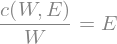



3
['substitute_RHS_for_LHS', 1, 2]


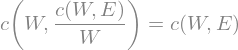



4
['substitute_RHS_for_LHS', 1, 3]


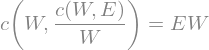



5
['integrate', 4, E]


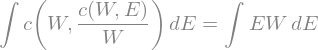



6
['integrate', 5, E]


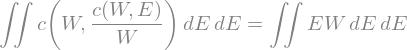

In [520]:
df = pd.read_pickle('derivations.pkl')

reconstruct_derivation(df, 302, True)

In [521]:
next_equation_data = []
loop = tqdm(range(len(df)))
for i in loop:
    next_equation_data.append(create_alternative_final_equations(df, i)[0])

  0%|          | 0/344 [00:00<?, ?it/s]

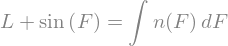

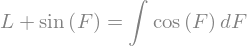

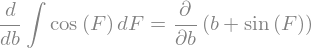

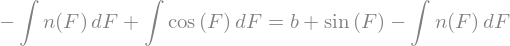

1
premise




2
['integrate', 1, F]


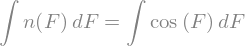



3
['evaluate_integrals', 2]


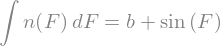



4
['substitute_LHS_for_RHS', 3, 2]


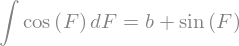



5
['evaluate_integrals', 4]




6
['substitute_RHS_for_LHS', 5, 3]


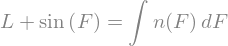

In [527]:
i = 340

final_eq = reconstruct_derivation(df, i)[-1][0]

display(final_eq)

for eq in next_equation_data[i][:4]:
    display(sp.sympify(eq))
    
reconstruct_derivation(df, i, True)

In [525]:
cols = ['neg_1_srepr', 'neg_2_srepr', 'neg_3_srepr', 'neg_4_srepr', 'neg_1', 'neg_2', 'neg_3', 'neg_4']

pd.DataFrame(next_equation_data, columns=cols)

,neg_1_srepr,neg_2_srepr,neg_3_srepr,neg_4_srepr,neg_1,neg_2,neg_3,neg_4
0,"Equality(Function('h')(Symbol('m', commutative...","Equality(Derivative(cos(Symbol('m', commutativ...","Equality(Function('h')(Symbol('m', commutative...","Equality(Derivative(Function('N')(Symbol('m', ...",h{\left(m \right)} = \frac{d}{d m} N{\left(m \...,\frac{d^{2}}{d m^{2}} \cos{\left(m \right)} = ...,h{\left(m \right)} = \frac{d}{d m} \cos{\left(...,\frac{d^{2}}{d m^{2}} N{\left(m \right)} = \fr...
1,"Equality(Function('A')(Symbol('u', commutative...","Equality(Mul(Function('A')(Symbol('u', commuta...","Equality(exp(Mul(Pow(Symbol('p', commutative=T...","Equality(Mul(Pow(Symbol('p', commutative=True)...","A{\left(u,p \right)} = \frac{b{\left(u,p \righ...","A{\left(u,p \right)} e^{\frac{b{\left(u,p \rig...","e^{\frac{p + u}{p}} = e^{A{\left(u,p \right)}}","\frac{b{\left(u,p \right)}}{p} = A{\left(u,p \..."
2,"Equality(Function('c')(Symbol('p', commutative...","Equality(Function('c')(Symbol('p', commutative...","Equality(Function('c')(Symbol('p', commutative...","Equality(Integral(Function('Q')(Symbol('p', co...","c{\left(p,G \right)} = v + \frac{e^{- \frac{i ...","c{\left(p,G \right)} = \int Q{\left(p,G \right...","c{\left(p,G \right)} = I + \frac{e^{- \frac{i ...","\int Q{\left(p,G \right)}\, dG = c{\left(p,G \..."
3,"Equality(Integer(0), Add(Mul(Integer(-1), Inte...","Equality(Integer(0), Mul(Add(Mul(Integer(-1), ...","Equality(Integral(Pow(Integer(0), Symbol('S', ...","Equality(Integral(Integer(0), Tuple(Symbol('S'...",0 = - 2 E{\left(S \right)} + 2 \log{\left(S \r...,0 = \left(- E{\left(S \right)} + \log{\left(S ...,"\int 0^{S}\, dS = \int \left(- E{\left(S \righ...","\int 0\, dS = \int \left(- E{\left(S \right)} ..."
4,"Equality(Derivative(Mul(Symbol('n', commutativ...","Equality(Function('y')(Symbol('l', commutative...","Equality(Mul(Pow(Function('y')(Symbol('l', com...",Equality(Add(Derivative(Function('y')(Symbol('...,\frac{\partial^{2}}{\partial n\partial R} n \l...,"y{\left(l,R,\frac{\partial}{\partial R} y{\lef...",\frac{\frac{\partial}{\partial R} n \left(R + ...,"\frac{\partial}{\partial R} y{\left(l,R,n \rig..."
...,...,...,...,...,...,...,...,...
339,"Equality(Derivative(Function('x')(Symbol('B', ...","Equality(exp(sin(Symbol('B', commutative=True)...","Equality(Mul(Symbol('B', commutative=True), ex...","Equality(Mul(Function('k')(Symbol('B', commuta...",\frac{d}{d B} x{\left(B \right)} = \frac{d}{d ...,e^{\sin{\left(B \right)}} = e^{x{\left(B \righ...,B e^{x{\left(B \right)}} = B e^{\sin{\left(B \...,\frac{k{\left(B \right)}}{\sin{\left(B \right)...
340,"Equality(Add(Symbol('L', commutative=True), si...","Equality(Add(Symbol('L', commutative=True), si...","Equality(Derivative(Integral(cos(Symbol('F', c...","Equality(Add(Mul(Integer(-1), Integral(Functio...",L + \sin{\left(F \right)} = \int \cos{\left(F ...,L + \sin{\left(F \right)} - \cos{\left(F \righ...,"\frac{d}{d b} \int \cos{\left(F \right)}\, dF ...","- \int n{\left(F \right)}\, dF + \int \cos{\le..."
341,"Equality(Pow(Mul(Pow(Symbol('S', commutative=T...","Equality(Integral(Add(Symbol('S', commutative=...","Equality(Integral(Mul(Pow(Symbol('S', commutat...","Equality(Integral(Mul(Pow(Symbol('S', commutat...","\left(\frac{S + p{\left(p,S,g \right)}}{S}\rig...","\int \left(S + p{\left(p,S,g \right)}\right)\,...","\int \frac{S + p{\left(p,S,g \right)}}{S}\, dp...","\int \frac{S + p{\left(p,S,g \right)}}{S}\, dp..."
342,Equality(exp(Integral(Function('x')(Symbol('R'...,"Equality(Mul(Symbol('R', commutative=True), Fu...","Equality(cos(Function('p')(Symbol('R', commuta...","Equality(Integral(Function('p')(Symbol('R', co...","e^{\int x{\left(R,Q \right)}\, dR} = e^{\int R...","R x{\left(R,Q \right)} = R p{\left(R,Q \right)}","\cos{\left(p{\left(R,Q \right)} \right)} = \co...","\int p{\left(R,Q \right)}\, dR = \int x{\left(..."


In [528]:
new_df = pd.concat([df, pd.DataFrame(next_equation_data, columns=cols)], axis=1)

new_df

,eq_idx_1,rule_1,arg_11,arg_12,arg_12_srepr,eq_1_srepr,eq_1,eq_idx_2,rule_2,arg_21,...,eq_6_srepr,eq_6,neg_1_srepr,neg_2_srepr,neg_3_srepr,neg_4_srepr,neg_1,neg_2,neg_3,neg_4
0,1,premise,,,,"Equality(Function('N')(Symbol('m', commutative...",N{\left(m \right)} = \cos{\left(m \right)},2,differentiate,1,...,"Equality(Derivative(cos(Symbol('m', commutativ...",\frac{d}{d m} \cos{\left(m \right)} = h{\left(...,"Equality(Function('h')(Symbol('m', commutative...","Equality(Derivative(cos(Symbol('m', commutativ...","Equality(Function('h')(Symbol('m', commutative...","Equality(Derivative(Function('N')(Symbol('m', ...",h{\left(m \right)} = \frac{d}{d m} N{\left(m \...,\frac{d^{2}}{d m^{2}} \cos{\left(m \right)} = ...,h{\left(m \right)} = \frac{d}{d m} \cos{\left(...,\frac{d^{2}}{d m^{2}} N{\left(m \right)} = \fr...
1,1,premise,,,,"Equality(Function('b')(Symbol('u', commutative...","b{\left(u,p \right)} = p + u",2,divide,1,...,"Equality(Derivative(exp(Mul(Pow(Symbol('p', co...",\frac{\partial}{\partial p} e^{\frac{b{\left(u...,"Equality(Function('A')(Symbol('u', commutative...","Equality(Mul(Function('A')(Symbol('u', commuta...","Equality(exp(Mul(Pow(Symbol('p', commutative=T...","Equality(Mul(Pow(Symbol('p', commutative=True)...","A{\left(u,p \right)} = \frac{b{\left(u,p \righ...","A{\left(u,p \right)} e^{\frac{b{\left(u,p \rig...","e^{\frac{p + u}{p}} = e^{A{\left(u,p \right)}}","\frac{b{\left(u,p \right)}}{p} = A{\left(u,p \..."
2,1,premise,,,,"Equality(Function('Q')(Symbol('p', commutative...","Q{\left(p,G \right)} = e^{G^{p}}",2,integrate,1,...,"Equality(Add(Symbol('K', commutative=True), Mu...",K + \frac{e^{- \frac{i \pi}{p}} \Gamma\left(\f...,"Equality(Function('c')(Symbol('p', commutative...","Equality(Function('c')(Symbol('p', commutative...","Equality(Function('c')(Symbol('p', commutative...","Equality(Integral(Function('Q')(Symbol('p', co...","c{\left(p,G \right)} = v + \frac{e^{- \frac{i ...","c{\left(p,G \right)} = \int Q{\left(p,G \right...","c{\left(p,G \right)} = I + \frac{e^{- \frac{i ...","\int Q{\left(p,G \right)}\, dG = c{\left(p,G \..."
3,1,premise,,,,"Equality(Function('E')(Symbol('S', commutative...",E{\left(S \right)} = \log{\left(S \right)},2,add,1,...,"Equality(Pow(Integer(0), Symbol('S', commutati...",0^{S} = \left(- 2 E{\left(S \right)} + 2 \log{...,"Equality(Integer(0), Add(Mul(Integer(-1), Inte...","Equality(Integer(0), Mul(Add(Mul(Integer(-1), ...","Equality(Integral(Pow(Integer(0), Symbol('S', ...","Equality(Integral(Integer(0), Tuple(Symbol('S'...",0 = - 2 E{\left(S \right)} + 2 \log{\left(S \r...,0 = \left(- E{\left(S \right)} + \log{\left(S ...,"\int 0^{S}\, dS = \int \left(- E{\left(S \righ...","\int 0\, dS = \int \left(- E{\left(S \right)} ..."
4,1,premise,,,,"Equality(Function('y')(Symbol('l', commutative...","y{\left(l,R,n \right)} = n \left(R + l\right)",2,differentiate,1,...,"Equality(Mul(Integer(-1), Pow(Function('y')(Sy...",- \frac{\frac{\partial}{\partial R} n \left(R ...,"Equality(Derivative(Mul(Symbol('n', commutativ...","Equality(Function('y')(Symbol('l', commutative...","Equality(Mul(Pow(Function('y')(Symbol('l', com...",Equality(Add(Derivative(Function('y')(Symbol('...,\frac{\partial^{2}}{\partial n\partial R} n \l...,"y{\left(l,R,\frac{\partial}{\partial R} y{\lef...",\frac{\frac{\partial}{\partial R} n \left(R + ...,"\frac{\partial}{\partial R} y{\left(l,R,n \rig..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,premise,,,,"Equality(Function('k')(Symbol('B', commutative...",k{\left(B \right)} = e^{\sin{\left(B \right)}},2,renaming_premise,,...,"Equality(Mul(Symbol('B', commutative=True), ex...",B e^{\sin{\left(B \right)}} = B e^{x{\left(B \...,"Equality(Derivative(Function('x')(Symbol('B', ...","Equality(exp(sin(Symbol('B', commutative=True)...","Equality(Mul(Symbol('B', commutative=True), ex...","Equality(Mul(Function('k')(Symbol('B', commuta...",\frac{d}{d B} x{\left(B \right)} = \frac{d}{d ...,e^{\sin{\left(B \right)}} = e^{x{\left(B \ri

In [ ]:
new_df.to_pickle('example_next_eq_selection')